<a href="https://www.kaggle.com/code/zafarali27/eda-hote-booking?scriptVersionId=212062996" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing Libraries.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# Loading The Dataset

In [2]:
df = pd.read_csv(r"/kaggle/input/hotel-booking/hotel_booking.csv")

# EDA THE DATA

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
df.shape

(119390, 36)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [7]:
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [9]:
for col in df.describe(include="object").columns:
    print(col)
    print(df[col].unique())
    print(">"*50)
    

hotel
['Resort Hotel' 'City Hotel']
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [10]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
df.drop(["company","agent"],axis= 1,inplace = True)
df.dropna(inplace = True)

In [12]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [13]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


In [14]:
df = df[df["adr"]<5000]

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


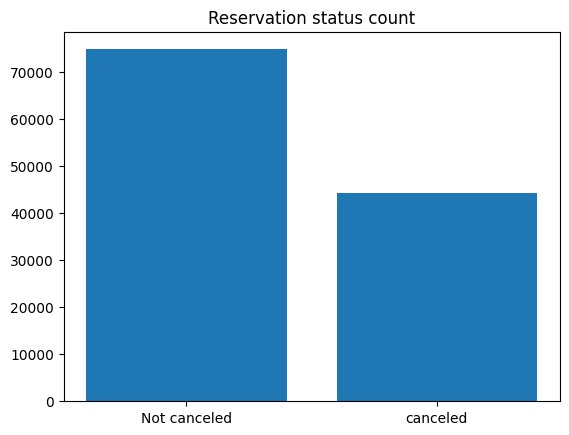

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


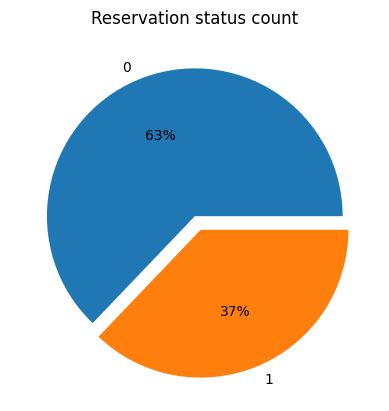

In [15]:
cancelled_count = df["is_canceled"].value_counts(normalize = True)
print(cancelled_count)
print(">"*50)

plt.bar(["Not canceled","canceled"], df["is_canceled"].value_counts())
plt.title("Reservation status count")
plt.show()
print(">"*50)

ex = [0,0.1]
plt.pie(cancelled_count, labels=cancelled_count.index, autopct='%.0f%%',explode=ex)
plt.title("Reservation status count")
plt.show()



#  The accompanying bar graph shows the percentage of reservalions that are canceled  and those that are not. it is obvious that there are still a significant number of reservations that have not been canceled. There ara stil 37% of clients who canceled their reservation,  which has a significant impact on the hotels earnings.

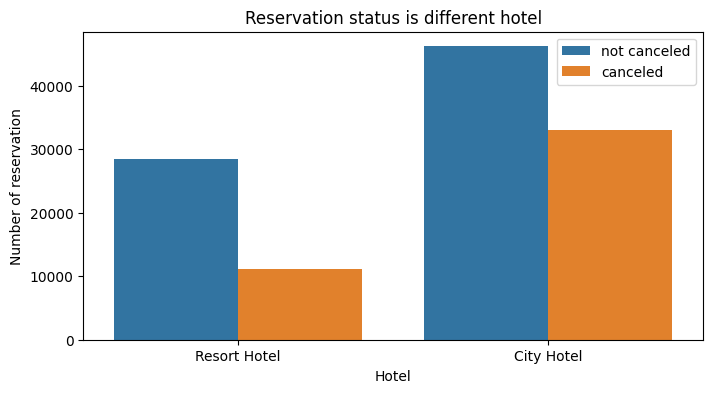

In [16]:
plt.figure(figsize = (8,4))
ax = sns.countplot(x = "hotel",hue="is_canceled",data=df)
legend_labels,_ =  ax .get_legend_handles_labels()
ax.legend(bbox_to_anchor = (1,1))
plt.title("Reservation status is different hotel")
plt.xlabel("Hotel")
plt.ylabel("Number of reservation")
plt.legend(["not canceled","canceled"])
plt.show()

In [17]:
resort_hotel = df[df["hotel"] == "Resort Hotel"]
resort_hotel["is_canceled"].value_counts(normalize = True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [18]:
city_hotel = df[df["hotel"] == "City Hotel"]
city_hotel["is_canceled"].value_counts(normalize = True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [19]:
resort_hotel = resort_hotel .groupby("reservation_status_date")[["adr"]].mean()
city_hotel = city_hotel .groupby("reservation_status_date")[["adr"]].mean()

# In comparison to resort hotels, city hotles have more booking . its possible that resort hotels are more expensive that those in cities.

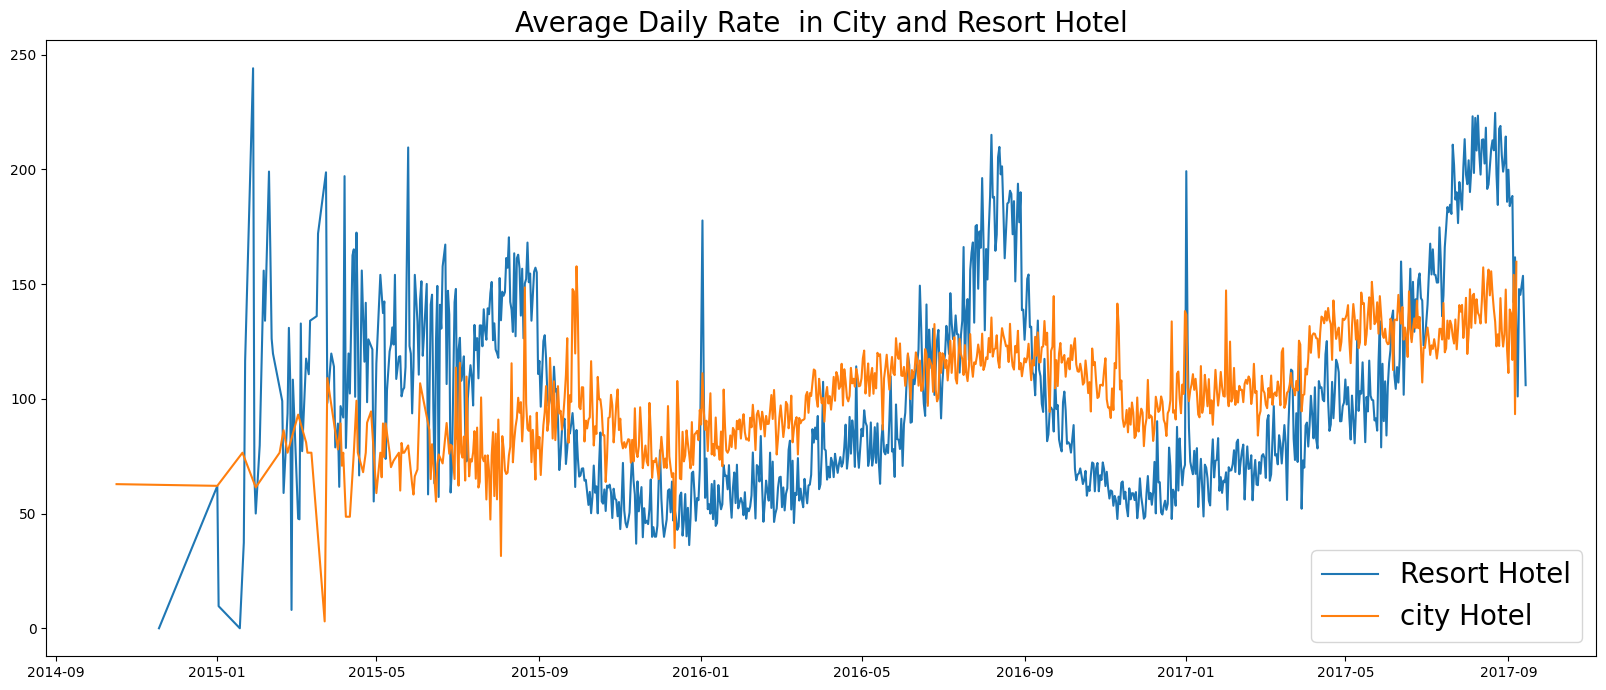

In [20]:
plt.figure(figsize = (20,8))
plt.title("Average Daily Rate  in City and Resort Hotel",fontsize = 20)
plt.plot(resort_hotel.index,resort_hotel["adr"],label = "Resort Hotel")
plt.plot(city_hotel.index,city_hotel["adr"],label = "city Hotel")
plt.legend(fontsize = 20)
plt.show()

# The line graph above shows that, on certain days, the average daily rate for a city hotel is less than that of a resort hotel, and on other days, it is ever less. it goes without saying that weekends and holidays may a rise in resort hotel rates.

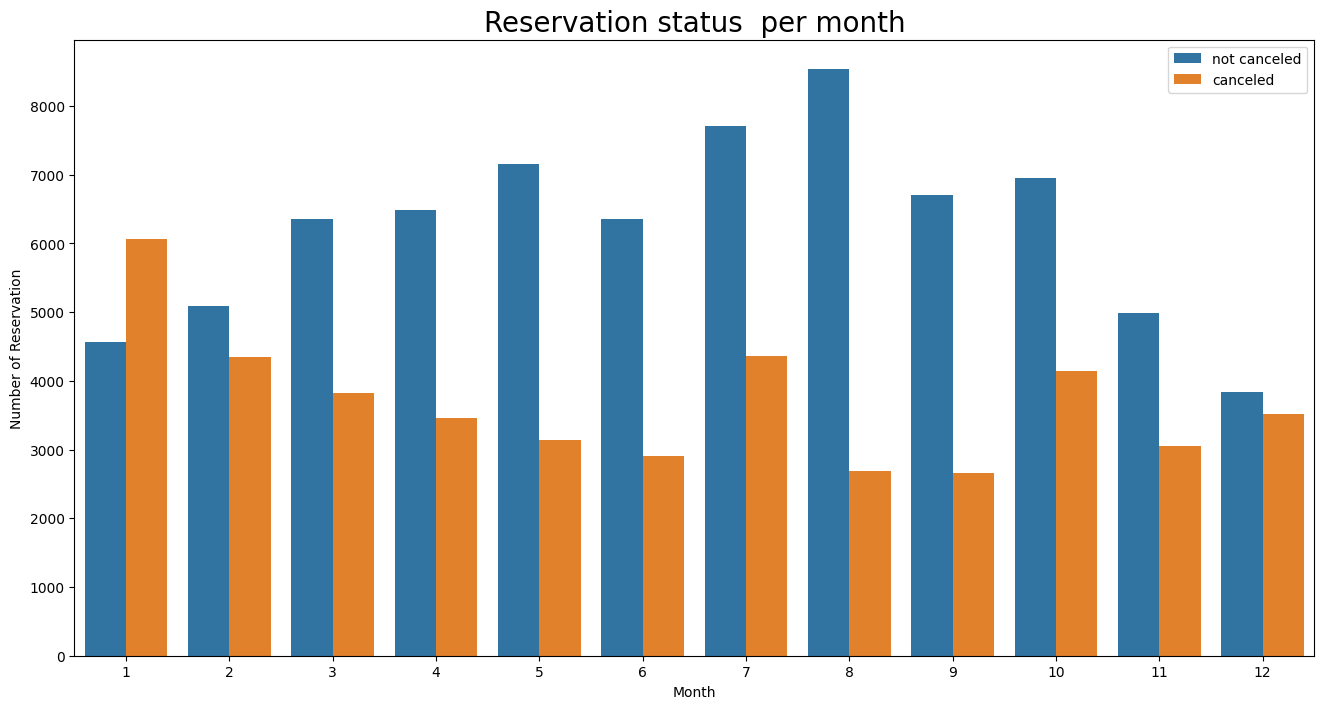

In [21]:
df["month"] = df["reservation_status_date"].dt.month
plt.figure(figsize = (16,8))
ax = sns.countplot(x ="month",hue = "is_canceled",data=df)
legend_labels,_ = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor = (1,1))
plt.title("Reservation status  per month", size = 20)
plt.xlabel("Month")
plt.ylabel("Number of Reservation")
plt.legend(["not canceled","canceled"])
plt.show()


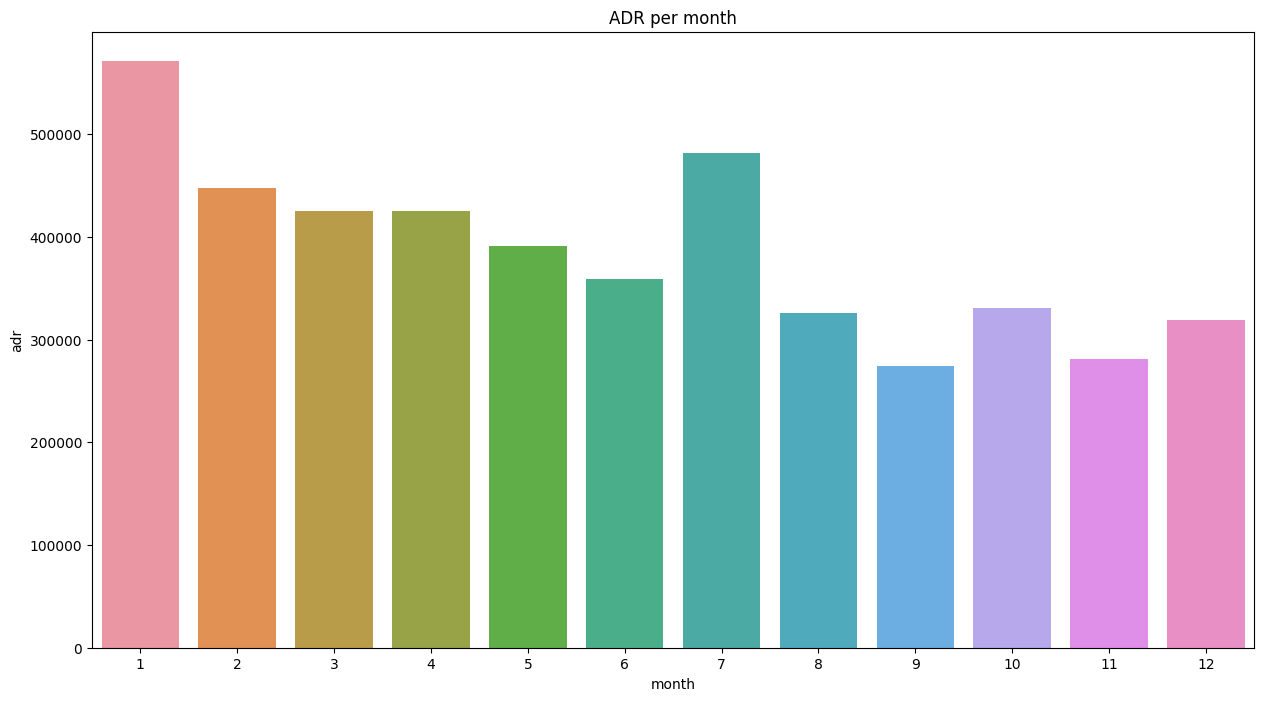

In [22]:

plt.figure(figsize=(15,8))
plt.title("ADR per month")
sns.barplot(x="month", y="adr", data=df[df["is_canceled"] == 1].groupby("month")[["adr"]].sum().reset_index())

plt.show()


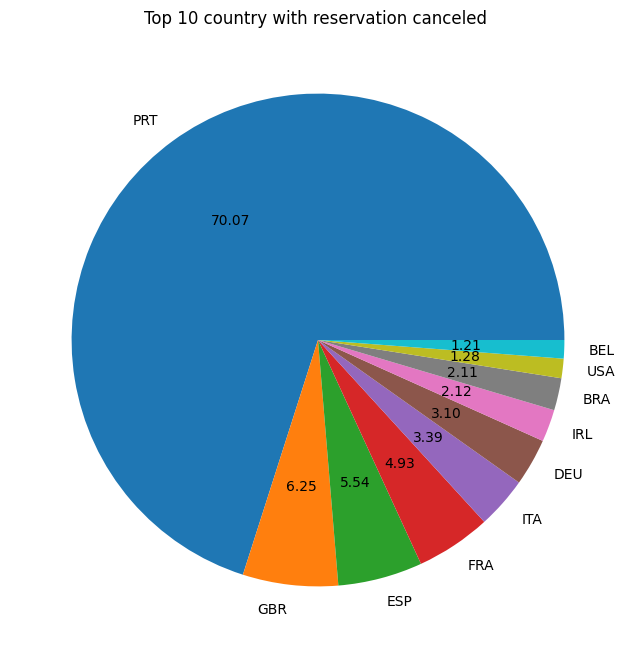

In [23]:
canceled_data = df[df["is_canceled"] == 1]
top_10_country = canceled_data["country"].value_counts()[:10]
plt.figure(figsize = (8,8))
plt.title("Top 10 country with reservation canceled ")
plt.pie(top_10_country,autopct = "%.2f",labels = top_10_country.index)
plt.show()

In [24]:
df["market_segment"].value_counts(normalize = True)

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

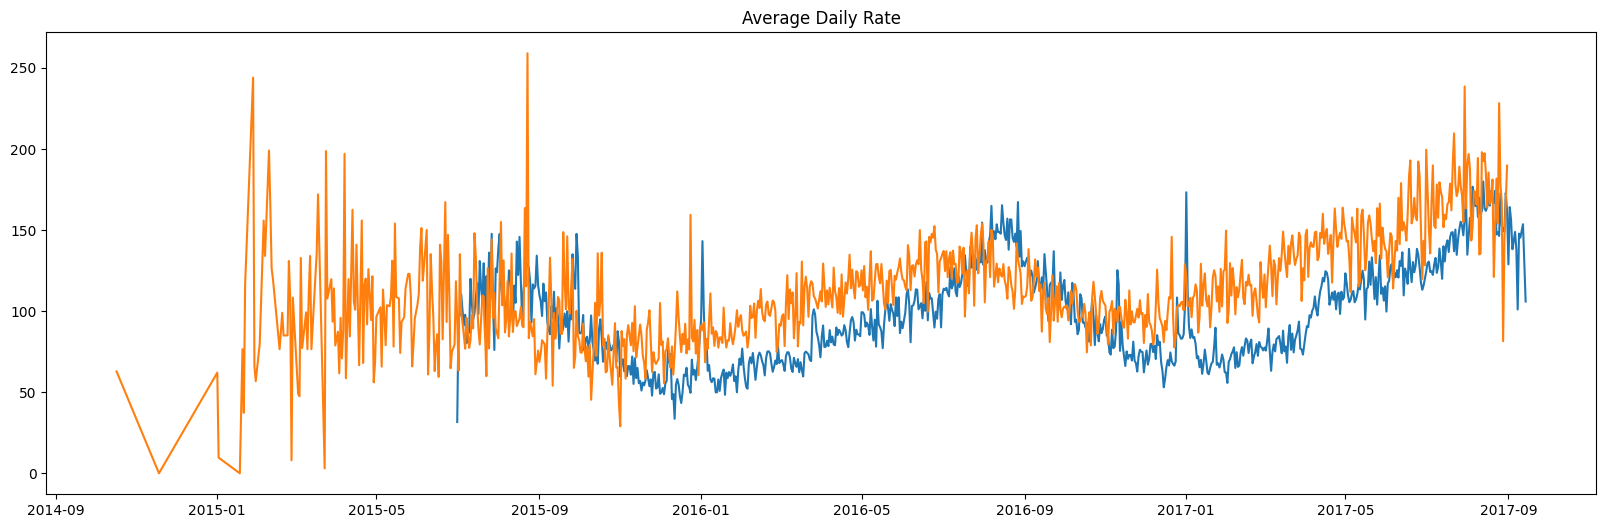

In [25]:
canceled_df_adr = canceled_data.groupby("reservation_status_date")[["adr"]].mean()
canceled_df_adr.reset_index(inplace = True)
canceled_df_adr.sort_values("reservation_status_date",inplace = True)

not_canceled_data = df[df["is_canceled"] == 0]
not_canceled_df_adr = not_canceled_data.groupby("reservation_status_date")[["adr"]].mean()
not_canceled_df_adr.reset_index(inplace = True)
not_canceled_df_adr.sort_values("reservation_status_date",inplace = True)


plt.figure(figsize = (20,6))
plt.title("Average Daily Rate")
plt.plot(not_canceled_df_adr["reservation_status_date"],not_canceled_df_adr["adr"],label = "Not Canceled")
plt.plot(canceled_df_adr["reservation_status_date"],canceled_df_adr["adr"],label = "Canceled")
plt.show()

# S uggestions
1. Cancellation rates rise as the price dose, in order to prevent cancellations of reservations , hotels could work on their pricing strategies and try to lower the rates for specific hotels on locations. They can also provide some discounts to the consumers.

2. As the ratio of the cancellation and not cancellation of the resort is higher in the resort hotel than the city hotels. So the hotels should provide a reasonable discount on the price on weekends or on holidays.

3. In the month of Jan , hotels can start campaigns or marketing with a  reasonable amount to in crease their revenue as the cancellation is the highest in this month.

4. They can also increase the quality of their hotels and their sevices mainly in portugal to reduce the cancellation rate. 


# Thank you for visiting my notebook